In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt

import rasterio
from rasterio.mask import mask

# metodo de clasificacion
import jenkspy

In [2]:
import numpy as np

In [3]:
# Cargar el shapefile que contiene el polígono para el recorte
shapefile_path = r'G:\OneDrive - Ingenio Azucarero Guabira S.A\_DATOS_PYTHON\test_estimativas\LOTE_CAMPODULCE.shp'
poligono = gpd.read_file(shapefile_path)

In [4]:
# Cargar el raster (NDVI)
raster_path = r'G:\OneDrive - Ingenio Azucarero Guabira S.A\_DATOS_PYTHON\test_estimativas\30_CAMPO_DULCE_NDVI_2024-01-27.tif'
with rasterio.open(raster_path) as src:
    # El polígono debe estar en formato GeoJSON para la función mask
    geometrias = [poligono.geometry.values[0].__geo_interface__]
    
    # Crear la máscara
    out_image, out_transform = mask(src, geometrias, crop=True)
    
    # Copiar los metadatos del raster original para el nuevo archivo
    out_meta = src.meta.copy()

In [5]:
# Actualizar los metadatos para reflejar las nuevas dimensiones y transformación
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

In [6]:
# Guardar el raster recortado en un nuevo archivo
output_path = r'C:\Test\res.tif'
with rasterio.open(output_path, "w", **out_meta) as dest:
    dest.write(out_image)

In [7]:
# Ruta al archivo .tif
raster_path = r'C:\Test\res.tif'

In [8]:
# Leer el archivo .tif
with rasterio.open(raster_path) as src:
    ndvi = src.read(1)  # Leer la primera banda; NDVI suele estar en una sola banda

In [9]:
# Aplicar una máscara para excluir los valores 0
ndvi_masked = np.ma.masked_equal(ndvi, 0)

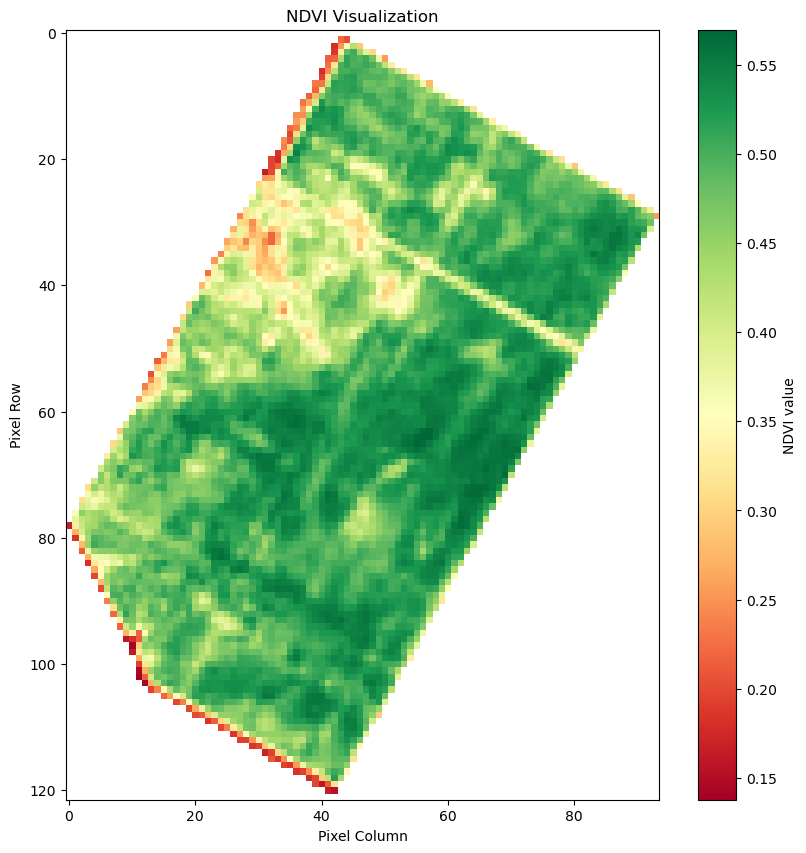

In [12]:
# Mostrar los datos de NDVI como una imagen, excluyendo los valores 0
plt.figure(figsize=(10, 10))
plt.imshow(ndvi_masked, cmap='RdYlGn')
plt.colorbar(label='NDVI value')
plt.title('NDVI Visualization')
plt.xlabel('Pixel Column')
plt.ylabel('Pixel Row')
plt.show()

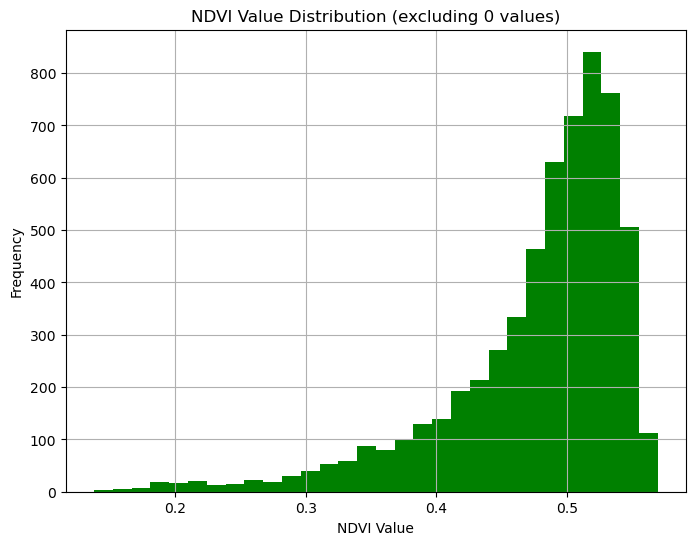

In [13]:
# Histograma de los valores de NDVI, excluyendo los valores 0
plt.figure(figsize=(8, 6))
plt.hist(ndvi_masked.compressed(), bins=30, color='green')
plt.title('NDVI Value Distribution (excluding 0 values)')
plt.xlabel('NDVI Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [14]:
ndvi_list = ndvi_masked.flatten().tolist()

In [15]:
with rasterio.open(r'C:\Test\res.tif') as src:
    ndvi_data = src.read(1)  # Leer la primera banda
    ndvi_values = ndvi_data[ndvi_data != 0]  # Excluir valores 0

# Convertir los valores a una lista
ndvi_list = ndvi_values.flatten().tolist()

In [16]:
len(ndvi_list)

5906

In [17]:
breaks = jenkspy.jenks_breaks(ndvi_list, n_classes=8)

In [18]:
breaks

[0.13768844306468964,
 0.25388601422309875,
 0.332182914018631,
 0.3887861967086792,
 0.4339740574359894,
 0.47137635946273804,
 0.5021148324012756,
 0.5291232466697693,
 0.5697399377822876]

In [19]:
# Ruta al archivo .tif
raster_path = r'C:\Test\res.tif'

In [71]:
# Define tus umbrales para la clasificación del NDVI
breaks = [0.0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

In [20]:
breaks

[0.13768844306468964,
 0.25388601422309875,
 0.332182914018631,
 0.3887861967086792,
 0.4339740574359894,
 0.47137635946273804,
 0.5021148324012756,
 0.5291232466697693,
 0.5697399377822876]

In [21]:
with rasterio.open(raster_path) as src:
    ndvi = src.read(1)  # Asume que NDVI está en la primera banda
    profile = src.profile

    # Inicializa una imagen con -1 (representando una categoría no clasificada)
    NDVI_class = np.full(ndvi.shape, -1.0, dtype=np.float32)

    # Clasifica los valores de NDVI en categorías
    for i, threshold in enumerate(breaks):
        NDVI_class = np.where((ndvi >= threshold) & (NDVI_class == -1.0), i + 1, NDVI_class)

    # Asegurarse de que la última categoría capture todos los valores por encima del último umbral
    NDVI_class = np.where(ndvi >= breaks[-1], len(breaks), NDVI_class)

In [22]:
# Opcionalmente, guarda el resultado como un nuevo archivo raster
output_path = r'C:\Test\res_class.tif'
with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(NDVI_class.astype(rasterio.float32), 1)

In [23]:
ndvi[100]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.19196193, 0.31914893, 0.39016017, 0.44619462,
       0.48722574, 0.49757868, 0.49746042, 0.46306735, 0.46067417,
       0.41604155, 0.44616747, 0.49391872, 0.49837518, 0.5032525 ,
       0.50609213, 0.5043245 , 0.51457465, 0.5123123 , 0.5098694 ,
       0.5066052 , 0.5052308 , 0.49241045, 0.4798179 , 0.48777506,
       0.5112736 , 0.5254135 , 0.5016413 , 0.5014837 , 0.5157399 ,
       0.5152582 , 0.5236994 , 0.5346705 , 0.5355751 , 0.54327065,
       0.54997146, 0.54297215, 0.52246696, 0.5095231 , 0.51691675,
       0.50860536, 0.5050908 , 0.49754867, 0.44851658, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [24]:
NDVI_class[100]

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1.], dtype=float32)

In [25]:
# Ruta al archivo .tif
raster_path = r'C:\Test\res_class.tif'

In [26]:
# Leer el archivo raster clasificado
with rasterio.open(output_path) as src:
    NDVI_classified = src.read(1)  # Asume que los datos clasificados están en la primera banda

# Definir una paleta de colores para las diferentes categorías
cmap = plt.cm.get_cmap('viridis', len(breaks))  # 'viridis' es solo un ejemplo, puedes elegir cualquier colormap disponible

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5784\1626232323.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(breaks))  # 'viridis' es solo un ejemplo, puedes elegir cualquier colormap disponible


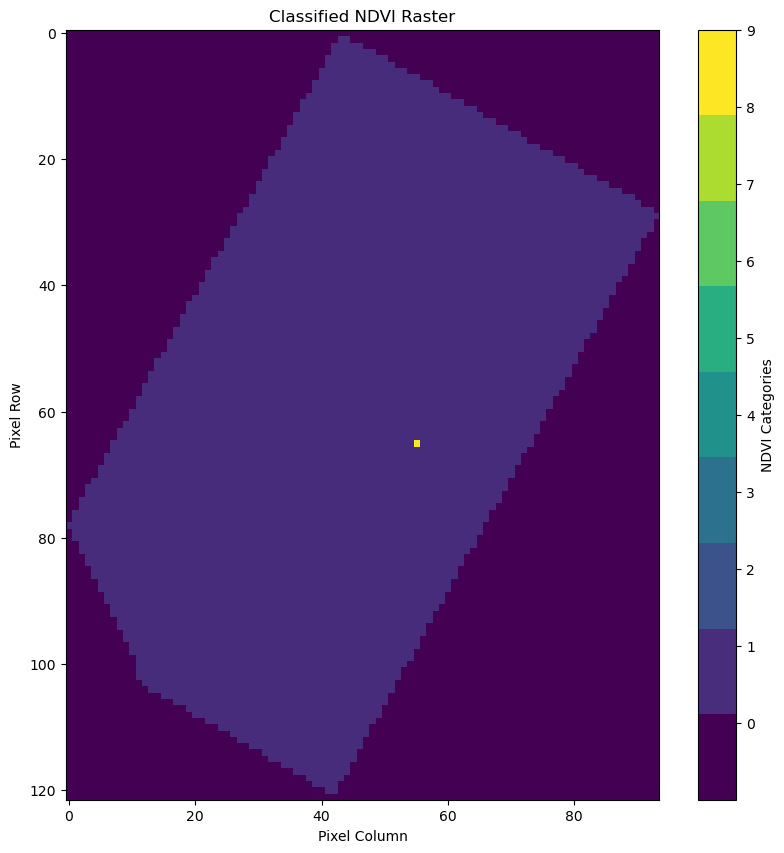

In [27]:
# Mostrar la imagen clasificada
plt.figure(figsize=(10, 10))
plt.imshow(NDVI_classified, cmap=cmap)
plt.colorbar(ticks=range(len(breaks)+1), label='NDVI Categories')
plt.title('Classified NDVI Raster')
plt.xlabel('Pixel Column')
plt.ylabel('Pixel Row')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5784\2525477698.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(breaks) + 1)  # Ajusta el número de colores a los breaks + 1 para la categoría inicial


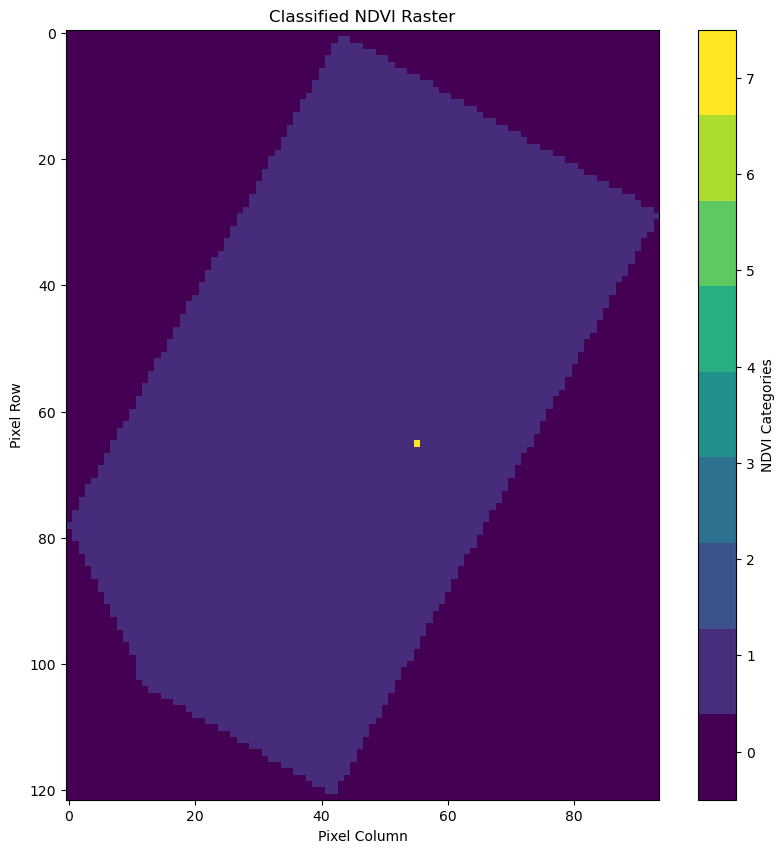

In [28]:

# Asumiendo que ya has definido 'breaks' en alguna parte de tu script, si no, define tus umbrales aquí
breaks = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]  # Ejemplo de umbrales

# Ruta al archivo raster clasificado
output_path = r'C:\Test\res_class.tif'  # Asegúrate de usar tu ruta correcta

# Leer el archivo raster clasificado
with rasterio.open(output_path) as src:
    NDVI_classified = src.read(1)  # Asume que los datos clasificados están en la primera banda

# Preparar la visualización con una paleta de colores adecuada
cmap = plt.cm.get_cmap('viridis', len(breaks) + 1)  # Ajusta el número de colores a los breaks + 1 para la categoría inicial

# Crear las etiquetas para la barra de color
labels = np.arange(len(breaks) + 1)
ticks = labels + 0.5

# Mostrar la imagen clasificada
plt.figure(figsize=(10, 10))
img = plt.imshow(NDVI_classified, cmap=cmap, vmin=0, vmax=len(breaks))
cbar = plt.colorbar(img, ticks=ticks, spacing='proportional')
cbar.set_ticklabels(labels)
cbar.set_label('NDVI Categories')

plt.title('Classified NDVI Raster')
plt.xlabel('Pixel Column')
plt.ylabel('Pixel Row')
plt.show()

In [51]:
import rasterio
import geopandas as gpd
import numpy as np
from rasterio.features import shapes

def classify_ndvi(ndvi_array, thresholds):
    """
    Clasifica una matriz NDVI basada en una lista de umbrales.
    Retorna una matriz con los valores de clasificación.
    """
    classified = np.zeros_like(ndvi_array, dtype=np.uint8)
    for i, threshold in enumerate(thresholds, start=1):
        classified[ndvi_array >= threshold] = i
    return classified

def main(ndvi_path, lote_shp_path, thresholds):
    # Cargar la imagen NDVI
    with rasterio.open(ndvi_path) as src:
        ndvi = src.read(1)  # Asume que NDVI está en la primera banda
        
        # Aplicar clasificación
        classified = classify_ndvi(ndvi, thresholds)
        
        # Convertir clasificación a polígonos
        mask = classified > 0  # Excluir los valores no clasificados
        results = ({'properties': {'class': v}, 'geometry': s}
                   for i, (s, v) in enumerate(
                       shapes(classified, mask=mask, transform=src.transform)))
        
        classified_gdf = gpd.GeoDataFrame.from_features(list(results))
        
    # Cargar el Shapefile del lote
    lote_gdf = gpd.read_file(lote_shp_path)
    
    # Intersección de polígonos con el lote
    intersection_gdf = gpd.overlay(classified_gdf, lote_gdf, how='intersection')
    
    # Calcular el área de cada polígono en hectáreas
    intersection_gdf['area_ha'] = intersection_gdf.area / 10000
    
    # Guardar el resultado en un Shapefile
    intersection_gdf.to_file("clasificacion_interseccionada.shp")

if __name__ == "__main__":
    ndvi_image_path = r'C:\Test\res_class.tif'
    lote_shp_path = r'G:\OneDrive - Ingenio Azucarero Guabira S.A\_DATOS_PYTHON\test_estimativas\LOTE_CAMPODULCE.shp'
    ndvi_thresholds = [0.13768844306468964,
 0.25388601422309875,
 0.332182914018631,
 0.3887861967086792,
 0.4339740574359894,
 0.47137635946273804,
 0.5021148324012756,
 0.5291232466697693,
 0.5697399377822876]
    main(ndvi_image_path, lote_shp_path, ndvi_thresholds)


C:\Users\Usuario\anaconda3\envs\utea\lib\site-packages\rasterio\__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_5784\2476251999.py:36: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:32720

  intersection_gdf = gpd.overlay(classified_gdf, lote_gdf, how='intersection')
C:\Users\Usuario\anaconda3\envs\utea\lib\site-packages\geopandas\io\file.py:633: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


In [ ]:
    ndvi_image_path = r'C:\Test\res_class.tif'
    lote_shp_path = r'G:\OneDrive - Ingenio Azucarero Guabira S.A\_DATOS_PYTHON\test_estimativas\LOTE_CAMPODULCE.shp'

In [52]:
ndvi_image_path = r'C:\Test\res_class.tif'
lote_shp_path = r'G:\OneDrive - Ingenio Azucarero Guabira S.A\_DATOS_PYTHON\test_estimativas\LOTE_CAMPODULCE.shp'
ndvi_thresholds = [0.13768844306468964,
                   0.25388601422309875,
                   0.332182914018631,
                   0.3887861967086792,
                   0.4339740574359894,
                   0.47137635946273804,
                   0.5021148324012756,
                   0.5291232466697693,
                   0.5697399377822876]

In [54]:
# Cargar la imagen NDVI
with rasterio.open(ndvi_image_path) as src:
    ndvi = src.read(1)  # Asume que NDVI está en la primera banda
        
    # Aplicar clasificación
    classified = classify_ndvi(ndvi, thresholds)
        
    # Convertir clasificación a polígonos
    mask = classified > 0  # Excluir los valores no clasificados
    results = ({'properties': {'class': v}, 'geometry': s}
               for i, (s, v) in enumerate(
                   shapes(classified, mask=mask, transform=src.transform)))
    classified_gdf = gpd.GeoDataFrame.from_features(list(results))

C:\Users\Usuario\anaconda3\envs\utea\lib\site-packages\rasterio\__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [60]:
classified

array([[9, 9, 9, ..., 9, 9, 9],
       [9, 9, 9, ..., 9, 9, 9],
       [9, 9, 9, ..., 9, 9, 9],
       ...,
       [9, 9, 9, ..., 9, 9, 9],
       [9, 9, 9, ..., 9, 9, 9],
       [9, 9, 9, ..., 9, 9, 9]], dtype=uint8)

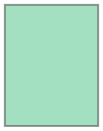

In [57]:
classified_gdf['geometry'][0]

In [61]:
import earthpy as et

ModuleNotFoundError: No module named 'earthpy'

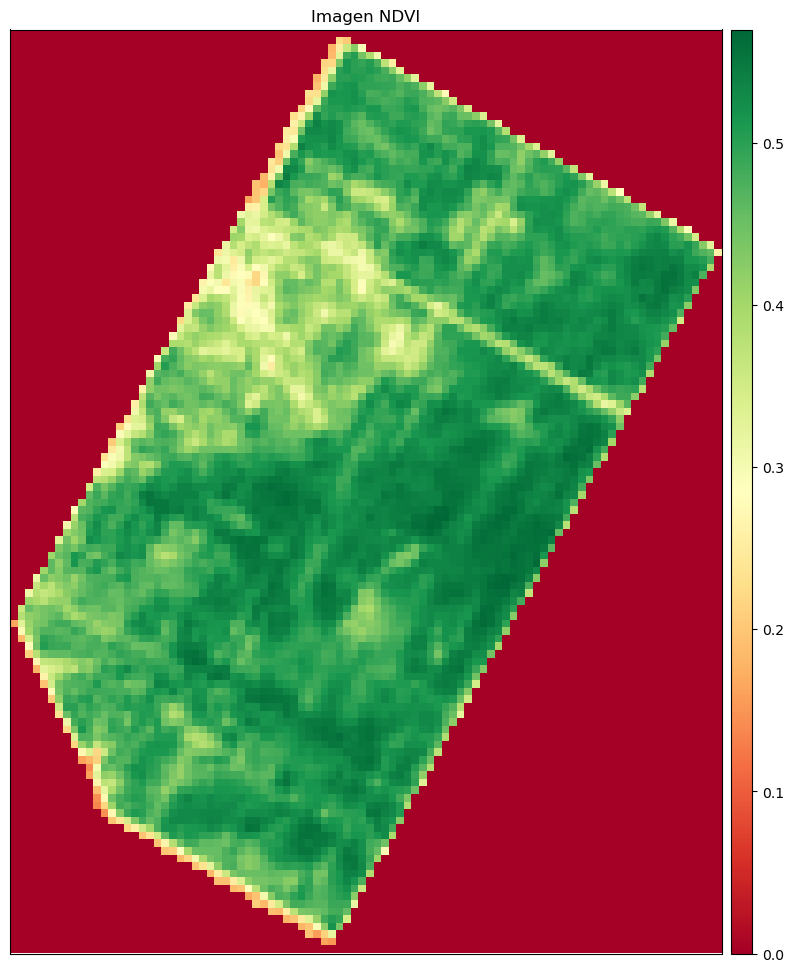

<Axes: title={'center': 'Imagen NDVI'}>

In [16]:
import earthpy.plot as ep
import rasterio

# Cargar la imagen NDVI
ndvi_path = r'C:\Test\res.tif'
with rasterio.open(ndvi_path) as ndvi_src:
    ndvi = ndvi_src.read(1)

# Visualizar la imagen NDVI
ep.plot_bands(ndvi, cmap="RdYlGn", title="Imagen NDVI")


In [17]:
thresholds = [0.13768844306468964,
                   0.25388601422309875,
                   0.332182914018631,
                   0.3887861967086792,
                   0.4339740574359894,
                   0.47137635946273804,
                   0.5021148324012756,
                   0.5291232466697693,
                   0.5697399377822876]

In [18]:
import numpy as np

classified_ndvi = np.digitize(ndvi, bins=thresholds)

In [23]:
import geopandas as gpd
from shapely.geometry import shape
from rasterio.features import shapes

# Convertir clasificación a polígonos (esto es pseudocódigo)
mask = classified_ndvi > 0  # Asume 0 como valor para "no data" o una clase específica que no quieres incluir
transform = ndvi_src.transform
polygons = shapes(classified_ndvi.astype(np.int16), mask=mask, transform=transform)

# Crear GeoDataFrame de los polígonos
gdf = gpd.GeoDataFrame.from_features([(polygon, {"class": value}) for polygon, value in polygons])

# Cargar el polígono del lote
lote_gdf = gpd.read_file("ruta/a/tu/poligono/lote.shp")

# Intersectar los polígonos clasificados con el lote
intersection_gdf = gpd.overlay(gdf, lote_gdf, how="intersection")

# Calcular el área de cada polígono en la intersección
intersection_gdf["area_ha"] = intersection_gdf.area / 10000  # Conversión de m² a hectáreas


TypeError: tuple indices must be integers or slices, not str

In [2]:
import geopandas as gpd

ImportError: DLL load failed while importing lib: No se encontró el proceso especificado.

In [26]:
import rasterio
import geopandas as gpd
import numpy as np
from rasterio.features import shapes
from shapely.geometry import shape

# Función para clasificar la imagen NDVI
def classify_ndvi(ndvi, thresholds):
    classified = np.digitize(ndvi, bins=thresholds)
    return classified.astype(np.int16)  # Asegurar el dtype correcto

# Cargar la imagen NDVI
ndvi_path = r'G:\OneDrive - Ingenio Azucarero Guabira S.A\_DATOS_PYTHON\test_estimativas\1289_LA_PASCANA_NDVI_2024-03-12.tif'
with rasterio.open(ndvi_path) as ndvi_src:
    ndvi = ndvi_src.read(1)  # NDVI en la primera banda
    transform = ndvi_src.transform

# Definir los umbrales de clasificación y clasificar
#thresholds =  [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8] # Ejemplo de umbrales
thresholds =  [0.0, 0.068, 0.136, 0.204, 0.272, 0.34, 0.408, 0.475, 0.542, 0.61, 0.678, 0.746, 0.813] # Ejemplo de umbrales


classified_ndvi = classify_ndvi(ndvi, thresholds)

# Convertir la clasificación NDVI a polígonos
mask = classified_ndvi > 0  # Excluir la clase '0' si es "no data"
polygons = shapes(classified_ndvi, mask=mask, transform=transform)

# Crear GeoDataFrame de los polígonos
polys = list(polygons)
gdf = gpd.GeoDataFrame([{'geometry': shape(polygon), 'class': value} for polygon, value in polys])

# Cargar el polígono del lote desde un archivo Shapefile y asegurar el mismo CRS
lote_gdf = gpd.read_file(r'C:\Test\pascana.shp')
gdf.crs = lote_gdf.crs

# Intersectar los polígonos clasificados con el lote
intersection_gdf = gpd.overlay(gdf, lote_gdf, how="intersection")

# Calcular el área de cada polígono en la intersección en hectáreas
intersection_gdf["area_ha"] = intersection_gdf.area / 10000

# Imprimir o guardar el GeoDataFrame resultante
print(intersection_gdf[['class', 'area_ha']])

    class   area_ha
0     6.0  0.000026
1     6.0  0.000002
2     7.0  0.153027
3     7.0  0.049869
4     6.0  0.012607
5     6.0  0.027581
6     7.0  0.019622
7     6.0  0.009526
8     6.0  0.319207
9     5.0  0.003771
10    7.0  0.055071
11    6.0  0.098117
12    7.0  0.590000
13    7.0  0.139628
14    7.0  0.060000
15    7.0  0.020000
16    6.0  0.054989
17    7.0  0.150000
18    8.0  0.000989
19    8.0  6.254783
20    7.0  0.002265
21    6.0  0.005811
22    8.0  0.006303
23    5.0  0.180189
24    7.0  1.253622
25    6.0  0.062200


<Axes: >

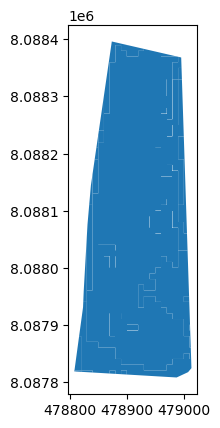

In [27]:
intersection_gdf.plot()

In [25]:
intersection_gdf.to_file("res_pascana_12-3.shp", driver="ESRI Shapefile")